In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
df = pd.read_csv("OnlineNewsPopularity.csv")
sns.set(style='darkgrid')
df.head()

,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,LDA_02,LDA_03,LDA_04,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,avg_positive_polarity,avg_negative_polarity,title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,12,219,0.663594,1.0,0.815385,4,2,1,0,...,0.040005,0.041263,0.040123,0.092562,0.045662,0.013699,0.378636,-0.350000,-0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,9,255,0.604743,1.0,0.791946,3,1,1,0,...,0.050096,0.050101,0.050001,0.148948,0.043137,0.015686,0.286915,-0.118750,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,9,211,0.575130,1.0,0.663866,3,1,1,0,...,0.033351,0.033334,0.682188,0.323333,0.056872,0.009479,0.495833,-0.466667,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,9,531,0.503788,1.0,0.665635,9,0,1,0,...,0.494651,0.028905,0.028572,0.100705,0.041431,0.020716,0.385965,-0.369697,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,13,1072,0.415646,1.0,0.540890,19,19,20,0,...,0.028575,0.028572,0.885427,0.281003,0.074627,0.012127,0.411127,-0.220192,0.136364,505


In [12]:
#checking for any null/NaN values in the dataset
pd.isnull()

,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,LDA_02,LDA_03,LDA_04,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,avg_positive_polarity,avg_negative_polarity,title_sentiment_polarity,shares
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39640,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39641,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39642,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [3]:
df.isnull().values.any()
#hence there are no missing values

False

In [4]:
df.columns

Index(['url', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' weekday_is_monday', ' weekday_is_tuesday',
       ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday',
       ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_00',
       ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' avg_positive_polarity',
       ' avg_negative_polarity', ' title_sentiment_polarity', ' shares'],
      dtype='object')

In [5]:
#stripping off any extra space for the column names
df.columns = df.columns.str.strip()
df.columns

Index(['url', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'avg_positive_polarity', 'avg_negative_polarity',
       'title_sentiment_polarity', 'shares'],
      dtype='object')

In [6]:
#removing the outliers using boxplot method by considering all the values only between the max value of upper whisker and min value of the lower whisker.
def Remove_Outlier(df):
    Q1 = df['shares'].quantile(0.25)
    Q3 = df['shares'].quantile(0.75)
    IQR = Q3 - Q1
    resultinglist = ~((df['shares'] < (Q1 - 1.5 * IQR)) |(df['shares'] > (Q3 + 1.5 * IQR)))
    return resultinglist

index_news_outlier = Remove_Outlier(df)
df = df[index_news_outlier]

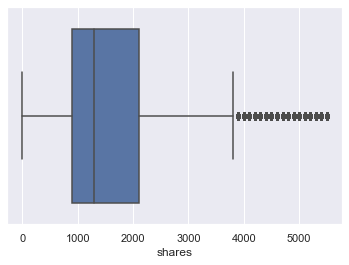

In [7]:
sns.boxplot(x=df['shares'])

#this indicates that the total shares distribution(consisting of outliers) is skewed to the right.
#we also notice that the range is quite large which indicates wider distribution, that is, more scattered data.

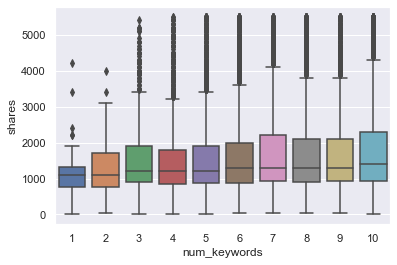

In [8]:
sns.boxplot(df['num_keywords'], df['shares'])

#we see that the medians of num_keywords ranging from 3-9 are approximately the same and the one with num_keyword =7 has more scattered data as compared to others.
#3,5 and 1,2 keywords in the metadata have approximately the same distributuion
#num_keyword = 10 has the highest range and has wider distribution among others whereas num_keyword=1 has the smallest range and has points consistently hovering around the center values

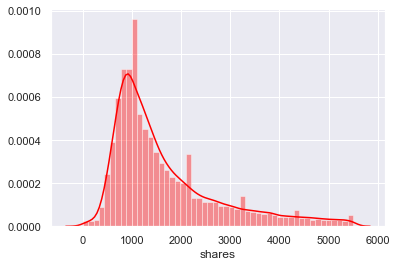

In [9]:
sns.distplot(df['shares'],color='red')

#we can see that most of the time,the total shares is high between 800-1000(approx)

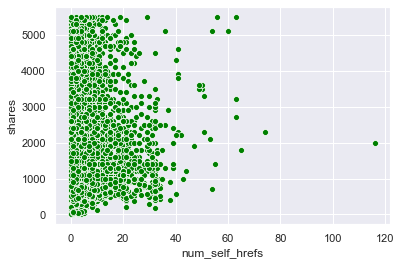

In [10]:
sns.scatterplot(df['num_self_hrefs'], df['shares'], color='green')

#we note that the there is a strong positive and linear correlation between 'Number of links to other articles published by Mashable' and 'shares'

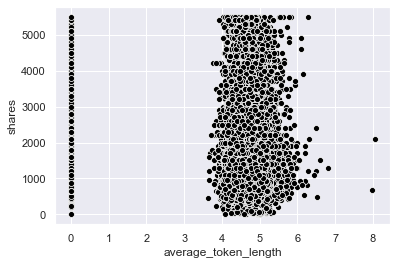

In [11]:
sns.scatterplot(df['average_token_length'], df['shares'], color='black')

#we note that the there is a strong positive and linear correlation between 'average_token_length' and 'shares'

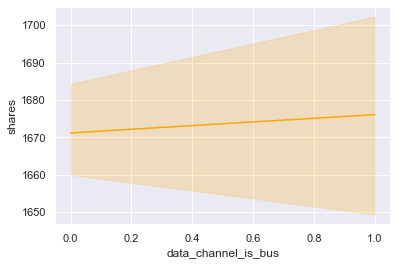

In [58]:
sns.lineplot(df['data_channel_is_bus'], df['shares'], color='orange')

#output shows that the no of shares is almost constant(slightly facing upward) with data channel as bus 

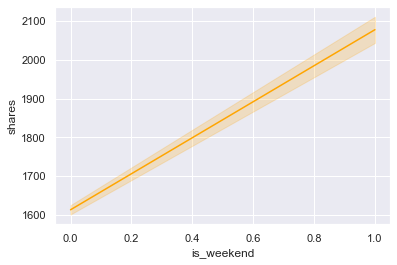

In [13]:
sns.lineplot(df['is_weekend'], df['shares'], color='orange')

#output shows that the no of shares is linearly increasing when the articles were published in the weekend

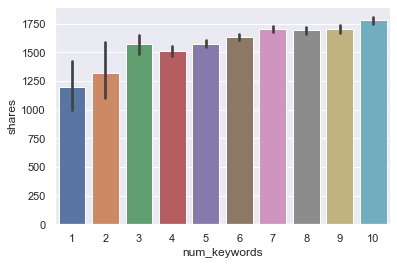

In [27]:
'''total_count=[]
share = df['shares'].tolist()
count1 = df['global_rate_positive_words'].sum()
count2 = df['global_rate_negative_words'].sum()
total_count.append(count1)
total_count.append(count2)
sns.barplot(total_count, height = share, color='orange', orientation='vertical')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')

plt.show()'''

sns.barplot(x=df['num_keywords'],y=df['shares'])
#we see that with increase in the number of keywords in metadata, no of shares also increases

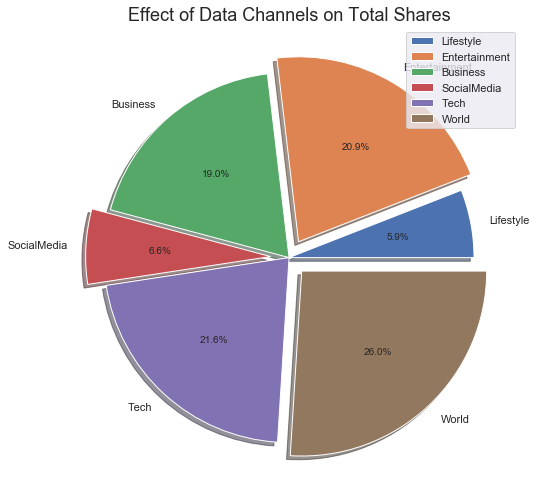

In [15]:
labels = ['Lifestyle', 'Entertainment', 'Business', 'SocialMedia', 'Tech', 'World']
data_channels   = [df ['data_channel_is_lifestyle'].sum(), df ['data_channel_is_entertainment'].sum(), df ['data_channel_is_bus'].sum(), 
         df ['data_channel_is_socmed'].sum(), df ['data_channel_is_tech'].sum(), df ['data_channel_is_world'].sum()]
#plt.axis("equal")
fig, ax1 = plt.subplots(figsize = (12,7))
explode =(0,0.1,0,0.1,0,0.1)
ax1.pie(data_channels, labels=labels, autopct='%.1f%%', explode = explode, shadow = True)
plt.legend(loc='upper right')
plt.title('Effect of Data Channels on Total Shares', fontsize= 18)
plt.tight_layout() 
plt.show()

#with entertainment data channel the number of shares is highest

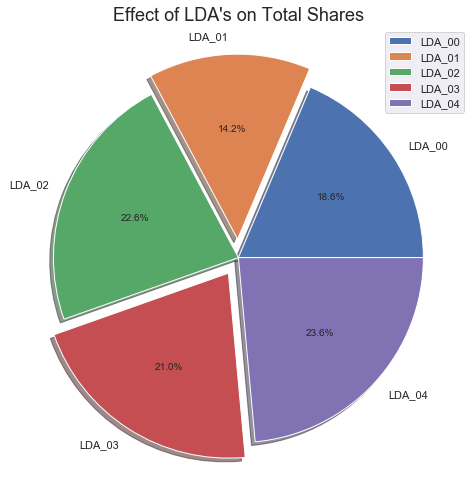

In [16]:
labels = ['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']
data_channels   = [df ['LDA_00'].sum(), df ['LDA_01'].sum(), df ['LDA_02'].sum(), 
         df ['LDA_03'].sum(), df ['LDA_04'].sum()]
#plt.axis("equal")
fig, ax1 = plt.subplots(figsize = (12,7))
explode =(0,0.1,0,0.1,0)
ax1.pie(data_channels, labels=labels, autopct='%1.1f%%', explode = explode, shadow = True)
plt.legend(loc='upper right')
plt.title('Effect of LDA\'s on Total Shares', fontsize = 18)
plt.tight_layout() 
plt.show()

#with LDA topic 4 the number of shares is highest

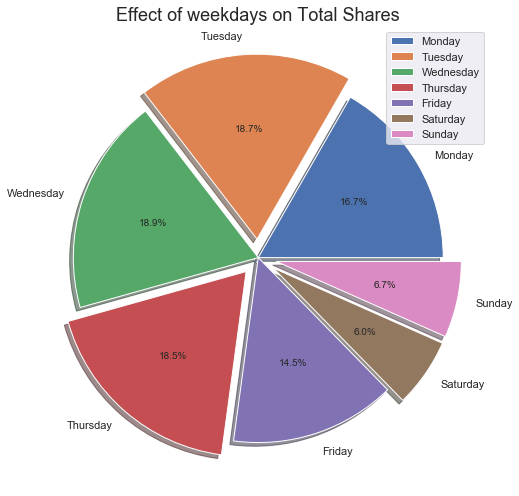

In [42]:
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data_channels   = [df ['weekday_is_monday'].sum(), df ['weekday_is_tuesday'].sum(), df ['weekday_is_wednesday'].sum(), 
         df ['weekday_is_thursday'].sum(), df ['weekday_is_friday'].sum(), df ['weekday_is_saturday'].sum(), df ['weekday_is_sunday'].sum()]
#plt.axis("equal")
fig, ax1 = plt.subplots(figsize = (12,7))
explode =(0,0.1,0,0.1,0,0.1,0.1)
ax1.pie(data_channels, labels=labels, autopct='%1.1f%%', explode = explode, shadow = True)
plt.legend(loc='upper right')
plt.title('Effect of weekdays on Total Shares', fontsize = 18)
plt.tight_layout() 
plt.show()

#On wednesday, number of shares was seen to be highest

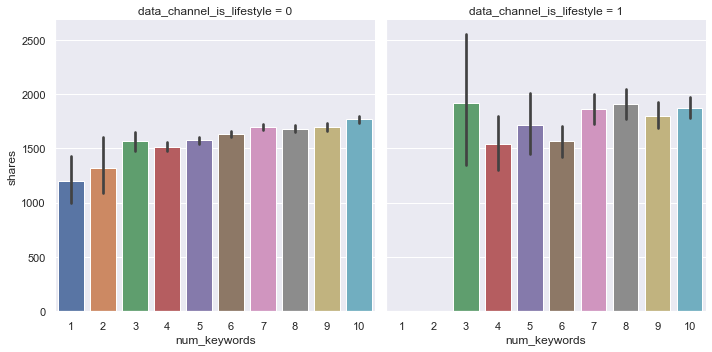

In [23]:
g = sns.catplot(x="num_keywords", y="shares",col="data_channel_is_lifestyle", kind="bar",data=df , height=5)

#we see that when the data channel is lifestyle, with increase in the number of keywords in metadata, total shares isn't effected a lot i.e there's no effective increase.
# whereas when the data channel is other than lifestyle, there is a gradualincrease in the number of shares with increase in number of keywords.

In [67]:
images = np.array(df['num_imgs'])
videos = np.array(df['num_videos'])
total = images + videos
me = total.mean()
print(me)

#I've tried used numpy to find the avg of the number of images and videos to find its effect/dependency on total shares

5.52360197134148


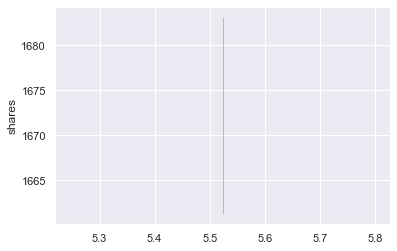

In [65]:
sns.lineplot(x = me, y= df['shares'], color='black')
# we see that the total shares increases lineraly when the avg number of images and videos together is approx 5.5

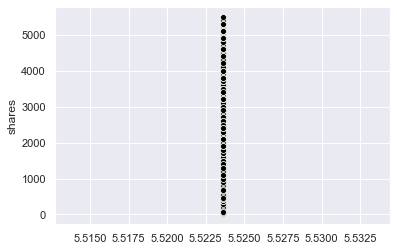

In [66]:
sns.scatterplot(x = me, y= df['shares'], color='black')
# we see a positive, strong and linear relationship between the number of shares and avg number of images and videos together